# For filtering the lower speeds out of the data

In [2]:
import pandas as pd

# Load the CSV file
file_path = 'speed_tracker_18_Apr_2024_06_55_45.csv'
data = pd.read_csv(file_path)

# Display the column names to find the correct one for speed
column_names = data.columns

# Exempt the first 20 rows
data_exempted = data.iloc[20:]

# Assuming the correct column name for speed is 'speed', filter out rows where the speed is less than 5 miles
# Update 'speed' with the actual column name once identified
filtered_data = data_exempted[data_exempted[' Speed (mph)'] >= 5]


In [3]:
filtered_data

,Date,Time,Elapsed time (sec),Distance (mi),Speed (mph),Latitude,Longitude,Accuracy (ft),Altitude (ft)
22,18/04/24,6:56 AM GMT-4,21,0.028088,6.738867,44.232132,-73.099158,15.257745,569.490753
23,18/04/24,6:56 AM GMT-4,22,0.031498,9.464919,44.232181,-73.099147,15.278932,566.924912
24,18/04/24,6:56 AM GMT-4,23,0.034739,10.477876,44.232228,-73.099147,15.303592,568.738775
25,18/04/24,6:56 AM GMT-4,24,0.037959,11.276881,44.232274,-73.099144,15.326284,565.777474
26,18/04/24,6:56 AM GMT-4,25,0.041165,11.433283,44.232321,-73.099138,15.327496,564.513637
...,...,...,...,...,...,...,...,...,...
3846,18/04/24,7:59 AM GMT-4,3845,53.875946,9.464552,44.135735,-72.659704,15.046081,822.751862
3847,18/04/24,7:59 AM GMT-4,3846,53.878662,8.904487,44.135769,-72.659733,15.054386,822.262409
3848,18/04/24,7:59 AM GMT-4,3847,53.881148,8.296424,44.135790,-72.659774,15.047406,822.080128
3849,18/04/24,7:59 AM GMT-4,3848,53.883255,7.291135,44.135797,-72.659815,15.041616,821.956613


In [3]:
import pandas as pd
from tkinter import Tk, Button, filedialog, Label, messagebox
import os

def process_csv(file_path):
    try:
        # Load the CSV file
        data = pd.read_csv(file_path)

        # Display the column names to find the correct one for speed
        column_names = data.columns
        print("Column Names:", column_names)

        # Exempt the first 20 rows
        data_exempted = data.iloc[20:]

        # Assuming the correct column name for speed is ' Speed (mph)', filter out rows where the speed is less than 5 miles
        # Update ' Speed (mph)' with the actual column name once identified
        filtered_data = data_exempted[data_exempted[' Speed (mph)'] >= 5]

        return filtered_data
    except Exception as e:
        messagebox.showerror("Error", f"Failed to process file {file_path}\n{str(e)}")
        return None

def save_filtered_csv(data, output_file_path):
    if data is not None:
        data.to_csv(output_file_path, index=False)
        messagebox.showinfo("Save Successful", f"File saved successfully as {output_file_path}")
    else:
        messagebox.showerror("Error", "No data to save.")

def open_files():
    file_paths = filedialog.askopenfilenames(title="Select CSV Files", filetypes=(("CSV Files", "*.csv"),))
    for file_path in file_paths:
        processed_data = process_csv(file_path)
        if processed_data is not None:
            save_file_path = filedialog.asksaveasfilename(defaultextension=".csv",
                                                          filetypes=(("CSV Files", "*.csv"),),
                                                          initialfile=os.path.basename(file_path))
            if save_file_path:
                save_filtered_csv(processed_data, save_file_path)

# Set up the main application window
root = Tk()
root.title("CSV Processor")
root.geometry("400x200")

# Add a button to open and process CSV files
btn_open_files = Button(root, text="Open CSV Files", command=open_files)
btn_open_files.pack(pady=20)

# Run the application
root.mainloop()


Column Names: Index(['Date', ' Time', ' Elapsed time (sec)', ' Distance (mi)',
       ' Speed (mph)', ' Latitude', ' Longitude', ' Accuracy (ft)',
       ' Altitude (ft)'],
      dtype='object')


# For GPS and Elevation Gain 

Total Elevation Gain: 1324.938079907135 feet
Total Elevation Loss: -1565.3304920547334 feet


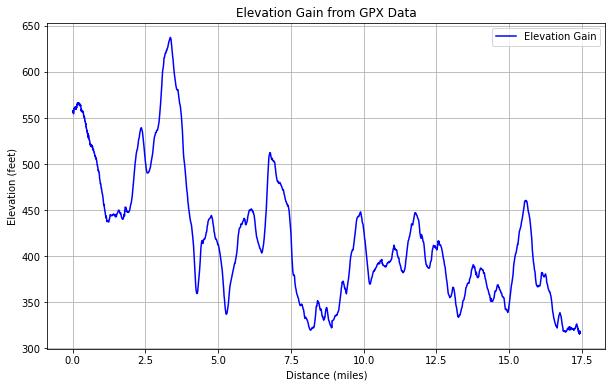

In [26]:
import gpxpy
import pandas as pd
import matplotlib.pyplot as plt

# Conversion factors
meters_to_feet = 3.28084
meters_to_miles = 0.000621371

# Load the GPX file
file_path = r'C:\Users\msikh\EV_Project\EV_Discharging_Data\NEUTC\Complete_Trip1_Data\speed_tracker_16_May_2024_12_18_29.gpx'

with open(file_path, 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

# Extract elevation data and calculate distances
elevation_data = []
distances = []
total_distance = 0

for track in gpx.tracks:
    for segment in track.segments:
        for i, point in enumerate(segment.points):
            if i > 0:
                previous_point = segment.points[i-1]
                distance = point.distance_3d(previous_point)
                total_distance += distance
                distances.append(total_distance * meters_to_miles)
            else:
                distances.append(0)
            elevation_data.append(point.elevation * meters_to_feet)

# Create a DataFrame
df = pd.DataFrame({'Distance (miles)': distances, 'Elevation (feet)': elevation_data})

# Calculate elevation differences
df['Elevation_Diff'] = df['Elevation (feet)'].diff()

# Calculate total elevation gain and loss
total_gain = df[df['Elevation_Diff'] > 0]['Elevation_Diff'].sum()
total_loss = df[df['Elevation_Diff'] < 0]['Elevation_Diff'].sum()

print(f"Total Elevation Gain: {total_gain} feet")
print(f"Total Elevation Loss: {total_loss} feet")

# Plot elevation gain
plt.figure(figsize=(10, 6))
plt.plot(df['Distance (miles)'], df['Elevation (feet)'], label='Elevation Gain', color='blue')
plt.xlabel('Distance (miles)')
plt.ylabel('Elevation (feet)')
plt.title('Elevation Gain from GPX Data')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import pandas as pd

# Load the CSV file
file_path = 'speed_tracker_16_May_2024_12_18_29.csv'
data = pd.read_csv(file_path)

# Assuming the altitude column is named 'Altitude' and starts from the first row of data
# Adjust the column name if necessary
altitude_column = ' Altitude (ft)'

# Calculate the differences between consecutive altitude values
data['Elevation_Change'] = data[altitude_column].diff()

# Calculate elevation gain (positive changes) and loss (negative changes)
data['Elevation_Gain'] = data['Elevation_Change'].apply(lambda x: x if x > 0 else 0)
data['Elevation_Loss'] = data['Elevation_Change'].apply(lambda x: -x if x < 0 else 0)

# Sum up the total elevation gain and loss
total_gain = data['Elevation_Gain'].sum()
total_loss = data['Elevation_Loss'].sum()

# Output the results
print(f"Total Elevation Gain: {total_gain} feet")
print(f"Total Elevation Loss: {total_loss} feet")


Total Elevation Gain: 1324.938079907135 feet
Total Elevation Loss: 1565.3304920547332 feet


In [2]:
import pandas as pd

# Existing data
data = [
    ["01 Apr 2024", "A", 3147, -3411],
    ["01 Apr 2024", "B", 3023, -2762],
    ["02 Apr 2024", "A", 2964, -2688],
    ["03 Apr 2024", "A", 3034, -3281],
    ["03 Apr 2024", "B", 3035, -2798],
    ["04 Apr 2024", "A", 3099, -2832],
    ["09 Apr 2024", "A", 3365, -3584],
    ["09 Apr 2024", "B", 3027, -2754],
    ["11 Apr 2024", "A", 3327, -3547],
    ["11 Apr 2024", "B", 3107, -2844],
    ["12 Apr 2024", "A", 3320, -3565],
    ["12 Apr 2024", "B", 3296, -3027],
    ["16 Apr 2024", "A", 3915, -4189],
    ["16 Apr 2024", "B", 3027, -2761],
    ["17 Apr 2024", "A", 2687, -3312],
    ["17 Apr 2024", "B", 3160, -2906],
    ["18 Apr 2024", "A", 3206, -3441],
    ["18 Apr 2024", "B", 3128, -2910],
    ["23 Apr 2024", "A", 3116, -2852],
    ["09 May 2024", "A", 3005, -3446],
]

# New data
new_data = [
    ["26 Feb 2024", "B", 3146, -2889],
    ["27 Feb 2024", "A", 3223, -3463],
    ["29 Feb 2024", "A", 3375, -3616],
    ["12 Mar 2024", "B", 2950, -2700],
    ["14 Mar 2024", "A", 3150, -3377],
    ["14 Mar 2024", "B", 2962, -2699],
    ["15 Mar 2024", "A", 2808, -3050],
    ["15 Mar 2024", "B", 3156, -2906],
    ["19 Mar 2024", "A", 2955, -3215],
    ["20 Mar 2024", "B", 3145, -2897],
    ["21 Mar 2024", "A", 3442, -3655],
    ["21 Mar 2024", "B", 2946, -2585],
    ["22 Mar 2024", "A", 3449, -4143],
    ["25 Mar 2024", "B", 2878, -2620],
    ["26 Mar 2024", "B", 3004, -2753],
    ["27 Mar 2024", "B", 2976, -2713],
    ["28 Mar 2024", "A", 2905, -3148],
    ["28 Mar 2024", "B", 3044, -2784],
]

# Combine the data
combined_data = data + new_data

# Convert to DataFrame
df = pd.DataFrame(combined_data, columns=["Date", "Trip", "Elevation Gain", "Elevation Loss"])

# Save to Excel file
output_file_path = 'elevation_gain_loss_combined.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Processed data saved to {output_file_path}")


Processed data saved to elevation_gain_loss_combined.xlsx
